# K-means Clustering 실습
* 비만도 데이터 – 직접 실습
* bmi.csv 데이터 파일 사용
    * 상위 데이터 100개중 height와 weight를 사용해서 분류
    * 아래 내용중에서 cluster_id는 분류된 cluster 값이다

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, f1_score

from library.kmeans import plot_elbow

In [49]:
bmi = pd.read_csv('./data/bmi.csv')
bmi

,label,height,weight
0,normal,188,71
1,fat,161,68
2,thin,178,52
3,fat,136,63
4,normal,145,52
...,...,...,...
19995,thin,163,48
19996,fat,139,70
19997,normal,150,48
19998,normal,189,69


In [50]:
bmi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   20000 non-null  object
 1   height  20000 non-null  int64 
 2   weight  20000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 468.9+ KB


In [51]:
bmi.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
label,20000,3,fat,7673,NaN,NaN,NaN,NaN,NaN,NaN,NaN
height,20000.0,NaN,NaN,NaN,160.09205,23.385464,120.0,140.0,160.0,180.0,200.0
weight,20000.0,NaN,NaN,NaN,57.37765,13.260121,35.0,46.0,57.0,69.0,80.0


In [52]:
bmi = bmi[:100]
bmi

,label,height,weight
0,normal,188,71
1,fat,161,68
2,thin,178,52
3,fat,136,63
4,normal,145,52
...,...,...,...
95,fat,151,60
96,normal,195,79
97,fat,121,79
98,thin,180,35


In [53]:
X_data = bmi.iloc[:, 1:]
y_data = bmi.iloc[:, 0]

## 데이터 시각화

In [54]:
X_data

,height,weight
0,188,71
1,161,68
2,178,52
3,136,63
4,145,52
...,...,...
95,151,60
96,195,79
97,121,79
98,180,35


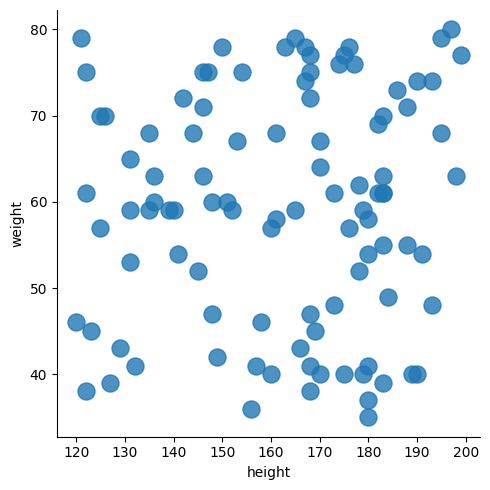

In [55]:
sns.lmplot(x='height', y='weight', data=X_data, fit_reg=False, scatter_kws={"s": 150})
plt.show()

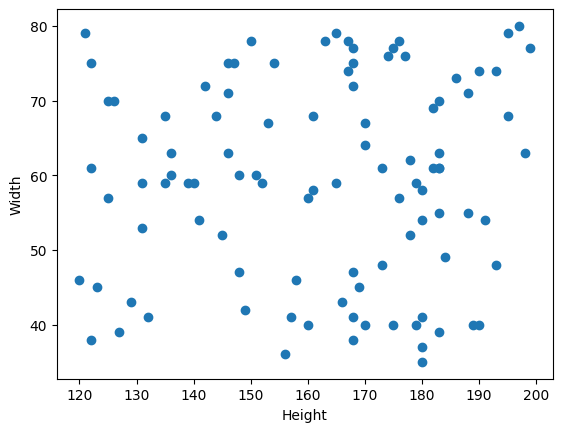

In [56]:
plt.scatter(data=bmi, x='height', y='weight')
plt.xlabel("Height")
plt.ylabel("Width")
plt.show()

In [57]:
X_data

,height,weight
0,188,71
1,161,68
2,178,52
3,136,63
4,145,52
...,...,...
95,151,60
96,195,79
97,121,79
98,180,35


C:\Users\medici\miniconda3\envs\deeplearning\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  "KMeans is known to have a memory leak on Windows "


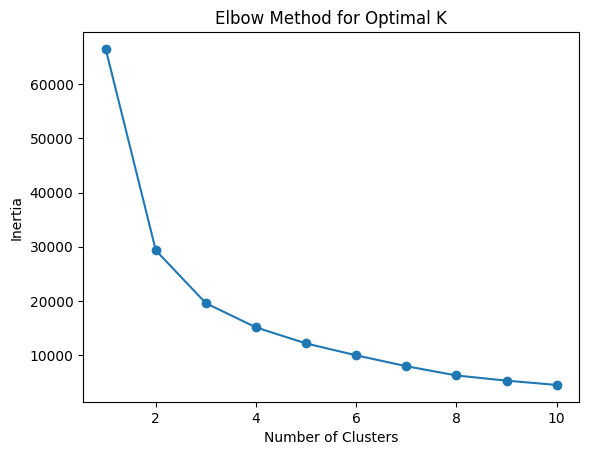

In [58]:
plot_elbow(X_data, n_init=10)

## KMeans 학습

In [59]:
model = KMeans(n_clusters=3, init="k-means++") # 모형 생성. 클러스터 = 3
model.fit(X_data)
model.cluster_centers_ # 각 클러스터의 중심값

array([[137.02702703,  60.18918919],
       [179.27272727,  70.39393939],
       [174.26666667,  45.83333333]])

In [60]:
pred = model.predict(X_data) # 데이터가 속하는 클러스터 예측
pred

array([1, 1, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 1, 0, 2,
       2, 0, 2, 0, 0, 2, 1, 1, 0, 2, 2, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 2,
       1, 2, 0, 2, 1, 1, 2, 2, 2, 2, 1, 0, 2, 0, 2, 2, 0, 1, 0, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 1,
       0, 1, 2, 2, 1, 0, 1, 0, 1, 0, 2, 2])

In [61]:
bmi.loc[:, 'pred'] = pred

C:\Users\medici\miniconda3\envs\deeplearning\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


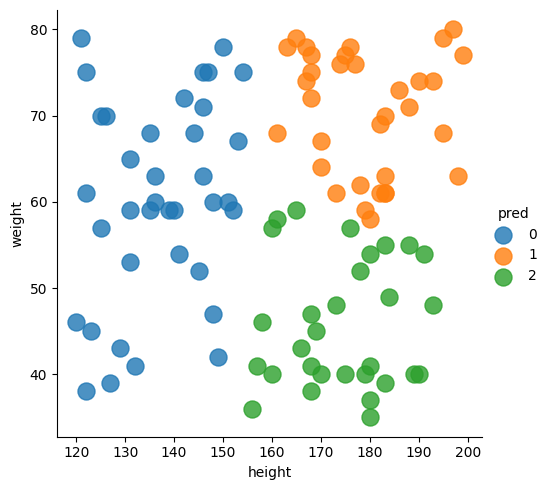

In [62]:
sns.lmplot(x='height', y='weight', hue="pred", data=bmi, fit_reg=False, scatter_kws={"s": 150})
plt.show()

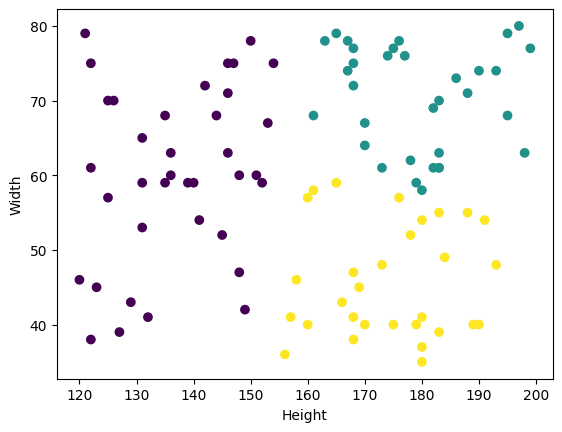

In [63]:
plt.scatter(data=bmi, x='height', y='weight', c='pred')
plt.xlabel("Height")
plt.ylabel("Width")
plt.show()

### 점수 계산

### pred label matching

In [64]:
bmi.head(30)

,label,height,weight,pred
0,normal,188,71,1
1,fat,161,68,1
2,thin,178,52,2
3,fat,136,63,0
4,normal,145,52,0
5,fat,123,45,0
6,fat,135,59,0
7,thin,169,45,2
8,fat,120,46,0
9,fat,154,75,0


In [65]:
obesity = {1:"normal", 0:"fat", 2:"thin"}

In [66]:
bmi.loc[:, 'pred'] = bmi['pred'].apply(lambda x: obesity[x])

C:\Users\medici\miniconda3\envs\deeplearning\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [67]:
acc_score = accuracy_score(bmi['label'], bmi['pred'])
f1score = f1_score(bmi['label'], bmi['pred'], average='macro')
acc_score, f1score

(0.74, 0.7264880952380953)

## 전체 데이터 대해 학습

In [68]:
bmi = pd.read_csv('./data/bmi.csv')

In [69]:
X_data = bmi.iloc[:, 1:]
y_data = bmi.iloc[:, 0]

In [70]:
model = KMeans(n_clusters=3, init="k-means++") # 모형 생성. 클러스터 = 3
model.fit(X_data)
model.cluster_centers_ # 각 클러스터의 중심값

array([[160.07528174,  57.43185575],
       [186.98537095,  57.3204956 ],
       [133.00105327,  57.38098104]])

In [71]:
pred = model.predict(X_data) # 데이터가 속하는 클러스터 예측
pred

array([1, 0, 1, ..., 0, 1, 2])

In [72]:
bmi.loc[:, 'pred'] = pred

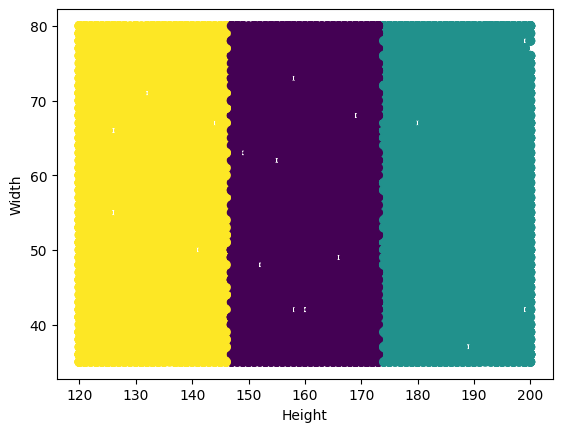

In [73]:
plt.scatter(data=bmi, x='height', y='weight', c='pred')
plt.xlabel("Height")
plt.ylabel("Width")
plt.show()

In [86]:
import pandas as pd

data = pd.Series([10, 20, 30], index=pd.to_datetime(['2023-09-07', '2023-09-08', '2023-09-09']))
print(data['2023-09-08'])
print(data['2023-09-08':'2023-09-09'])

20
2023-09-08    20
2023-09-09    30
dtype: int64


In [87]:
data

2023-09-07    10
2023-09-08    20
2023-09-09    30
dtype: int64